# Clean data in spreadsheets with sorting and filtering with pandas
Based on Coursera - Prepare data for visualization

This task is meant to be done in Google Sheets. I am doing it using pandas for practice.

In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Overview

This notebook performs data cleaning to correct or remove incorrect, missing or faulty data.

## Problem description
The Coursera course provides access to the student performance data CSV file.

A school district collected student performance data from two high schools based on academic reports and student surveys. The dataset contains entries for students regarding their age, their background (guardian's education level, for instance) and their school performance. We want to clean the data for future data analysis.


## Step 1: Access the spreadsheet

  school sex  age address famsize Pstatus                           Medu  \
0     GP   F   18       U     GT3       A               higher education   
1     GP   F   17       U     GT3       T  primary education (4th grade)   
2     GP   F   15       U     LE3       T  primary education (4th grade)   

                            Fedu     Mjob     Fjob  ... famrel freetime  \
0               higher education  at_home  teacher  ...      4        3   
1  primary education (4th grade)  at_home    other  ...      5        3   
2  primary education (4th grade)  at_home    other  ...      4        3   

   goout  Dalc  Walc health absences  G1  G2  G3  
0      4     1     1      3        4   0  11  11  
1      3     1     1      3        2   9  11  11  
2      2     2     3      3        6  12  13  12  

[3 rows x 33 columns]
The total number of students in the dataset is 649
The total number of students at school GP is 423 which is 65.18%
The total number of students at school MS is 226 wh

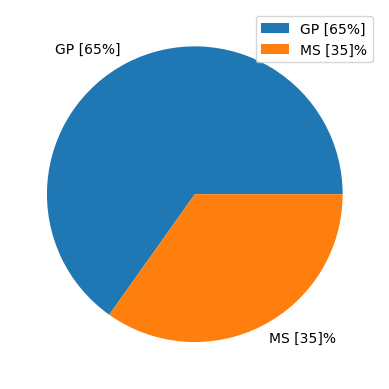

In [2]:
file_path = './datasets/student-performance-data.csv'

# Verify that the file path works.
if not os.path.isfile(file_path):
    fnf_err = f'{file_path} not found.'
    raise FileNotFoundError(fnf_err)
    
# Read the dataset
original_df = pd.read_csv(file_path)

# Exploratory data analysis.
print(original_df.head(3))

total_pop = len(original_df.index)
print(f"The total number of students in the dataset is {total_pop}")

# Find the number of students of each school (GP, MS) and how the population is spread in terms of sex.
gp_df = original_df.loc[original_df['school'] == 'GP']
ms_df = original_df.loc[original_df['school'] == 'MS']

gp_pop = len(gp_df.index)
gp_pop_pc = 100.*gp_pop/total_pop
ms_pop = len(ms_df.index)
ms_pop_pc = 100.*ms_pop/total_pop
print(f"The total number of students at school GP is {gp_pop} which is {gp_pop_pc:.2f}%")
print(f"The total number of students at school MS is {ms_pop} which is {ms_pop_pc:.2f}%")

plt.pie([gp_pop, ms_pop], labels = [f"GP [{gp_pop_pc:.0f}%]", f"MS [{ms_pop_pc:.0f}]%"])
plt.legend()
plt.show() 

### Remarks
The pie chart shows that the data isn't close to being equally split in between the two schools. GP is overrepresented compared to MS.

Score card checks out
There are 237 girls and 186 boys at GP.
There are 146 girls and 80 boys at GP.


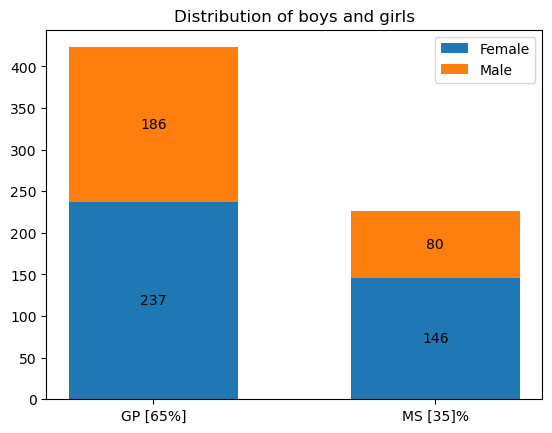

In [3]:
girls_gp = gp_df.loc[gp_df['sex'] == 'F']
boys_gp = gp_df.loc[gp_df['sex'] == 'M']
girls_ms = ms_df.loc[ms_df['sex'] == 'F']
boys_ms = ms_df.loc[ms_df['sex'] == 'M']

# We initialize a score card dictionary to keep track of key metrics.
schools = [f"GP [{gp_pop_pc:.0f}%]", f"MS [{ms_pop_pc:.0f}]%"]
score_card = {
    'Schools': ["GP", "MS"],
    'Population':[gp_pop, ms_pop],
    'Female': [len(girls_gp.index), len(girls_ms.index)],
    'Male': [len(boys_gp.index), len(boys_ms.index)]
}

def count_check(score_dict: dict) -> bool:
    """
    For each school, check that the total number of females and males adds up to the school population.
    """
    for s in range(2):
        if score_card['Population'][s] != score_card['Female'][s] + score_card['Male'][s]:
            return False
    return True

# Developer note: In a prod scenario, this should be re-factored.
if count_check(score_card):
    print("Score card checks out")
else:
    print("Score card doesn't check out")

print(f"There are {score_card['Female'][0]} girls and {score_card['Male'][0]} boys at GP.")
print(f"There are {score_card['Female'][1]} girls and {score_card['Male'][1]} boys at GP.")

width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(2)
for key, count in score_card.items():
    if key in ('Female', 'Male'):
        p = ax.bar(schools, count, width, label=key, bottom=bottom)
        bottom += count
        ax.bar_label(p, label_type='center')
ax.set_title('Distribution of boys and girls')
ax.legend()
plt.show()

### Remarks
The bar chart shows that for both schools, boys are overrepresented compared to girls.

## Step 2: Identify how to clean your data

In a spreadsheet editor, take a look at the following columns: school, age, reason, Medu and Fedu. Medu and Fedu refer to the mother's and father's education level.

## Step 3: For each school, get the student age range.
We need to make sure that the records reflect the accurate age range of students at each school.

In [4]:
# For each school, we find the extremes for age.
gp_age_bounds = [gp_df['age'].min(), gp_df['age'].max()]
ms_age_bounds = [ms_df['age'].min(), ms_df['age'].max()]

print(f"The youngest students at GP are {gp_age_bounds[0]} years old and at MS {ms_age_bounds[0]} years old.")
print(f"The oldest students at GP are {gp_age_bounds[1]} years old and at MS {ms_age_bounds[1]} years old.")

The youngest students at GP are 15 years old and at MS 15 years old.
The oldest students at GP are 22 years old and at MS 20 years old.


### Remarks:
The age range for students don't match for the schools. While the youngest students at both schools are 15, the oldest at GP are 22 vs 20 at MS.

## Step 4: Filter data
The age range of students should be 15 to 19. If there are entries with age > 19, they should be excluded.

The oldest are 22
The total number of students at school GP is 416 which is 65.00%
The total number of students at school MS is 224 which is 35.00%


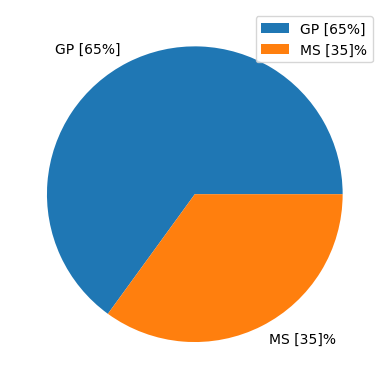

Score card checks out
The youngest students at GP are 15 years old and at MS 15 years old.
The oldest students at GP are 19 years old and at MS 19 years old.


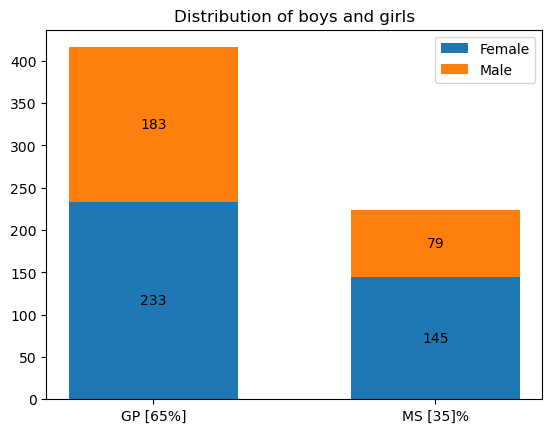

In [5]:
# Filter out entries with age > 19. 
max_allowed_age = 19
min_age = min(gp_age_bounds[0], ms_age_bounds[0])
print(f"The oldest are {original_df['age'].max()}")
# Use a list comprehension to generate a list of acceptable ages. Filter according to age within this list of acceptable values.
age_df = original_df.loc[original_df['age'].isin([_ for _ in range(min_age, max_allowed_age+1)])]

# Find the number of students of each school (GP, MS) and how the population is spread in terms of sex.
gp_df = age_df.loc[original_df['school'] == 'GP']
ms_df = age_df.loc[original_df['school'] == 'MS']

total_pop = len(age_df.index)
gp_pop = len(gp_df.index)
gp_pop_pc = 100.*gp_pop/total_pop
ms_pop = len(ms_df.index)
ms_pop_pc = 100.*ms_pop/total_pop
print(f"The total number of students at school GP is {gp_pop} which is {gp_pop_pc:.2f}%")
print(f"The total number of students at school MS is {ms_pop} which is {ms_pop_pc:.2f}%")

plt.pie([gp_pop, ms_pop], labels = [f"GP [{gp_pop_pc:.0f}%]", f"MS [{ms_pop_pc:.0f}]%"])
plt.legend()
plt.show() 

girls_gp = gp_df.loc[gp_df['sex'] == 'F']
boys_gp = gp_df.loc[gp_df['sex'] == 'M']
girls_ms = ms_df.loc[ms_df['sex'] == 'F']
boys_ms = ms_df.loc[ms_df['sex'] == 'M']

# We initialize a score card dictionary to keep track of key metrics.
schools = [f"GP [{gp_pop_pc:.0f}%]", f"MS [{ms_pop_pc:.0f}]%"]
score_card = {
    'Schools': ["GP", "MS"],
    'Population':[gp_pop, ms_pop],
    'Female': [len(girls_gp.index), len(girls_ms.index)],
    'Male': [len(boys_gp.index), len(boys_ms.index)]
}

if count_check(score_card):
    print("Score card checks out")
else:
    print("Score card doesn't check out")

gp_age_bounds = [gp_df['age'].min(), gp_df['age'].max()]
ms_age_bounds = [ms_df['age'].min(), ms_df['age'].max()]
print(f"The youngest students at GP are {gp_age_bounds[0]} years old and at MS {ms_age_bounds[0]} years old.")
print(f"The oldest students at GP are {gp_age_bounds[1]} years old and at MS {ms_age_bounds[1]} years old.")

width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(2)
for key, count in score_card.items():
    if key in ('Female', 'Male'):
        p = ax.bar(schools, count, width, label=key, bottom=bottom)
        bottom += count
        ax.bar_label(p, label_type='center')
ax.set_title('Distribution of boys and girls')
ax.legend()
plt.show()

## Step 5: Fill in missing data
It is suspected that the reason why a particular student chose a specific school may influence their performance. The reason column should not have empty entries. We fill in a placeholder for all empty entries in the reason column.

In [6]:
list_of_reasons = age_df['reason'].unique()
print(f"The list of reasons given = {list_of_reasons}")
age_df.loc[age_df['reason'].isnull(), 'reason'] = 'none_given'
list_of_reasons = age_df['reason'].unique()
print(f"The list of reasons given = {list_of_reasons}")

The list of reasons given = ['course' nan 'home' 'reputation']
The list of reasons given = ['course' 'none_given' 'home' 'reputation']


## Step 6: Convert data
We encode the parent education fields in numeric data values for future machine learning purposes. 
 none: 0, primary education (4th grade): 1, 5th to 9th grade: 2, secondary education: 3, higher education: 4

In [7]:
mapping_dictionary = {
    'none':0,
    'primary education (4th grade)': 1,
    '5th to 9th grade': 2,
    'secondary education': 3,
    'higher education': 4
}

# Map the mother's education level and get the list of reasons to check later.
age_df['Medu'].map(mapping_dictionary)
list_of_ed = age_df['Medu'].unique()
print(f"The reasons given are {list_of_ed}")
age_df['Fedu'].map(mapping_dictionary)
list_of_ed = age_df['Fedu'].unique()
print(f"The reasons given are {list_of_ed}")
# The education levels have been correctly mapped.

The reasons given are ['higher education' 'primary education (4th grade)' 'secondary education'
 '5th to 9th grade' 'none']
The reasons given are ['higher education' 'primary education (4th grade)' '5th to 9th grade'
 'secondary education' 'none']


## Step 7: Save the resulting dataframe as a CSV file

In [8]:
output_file_path = './datasets/student-performance-data-cleaned.csv'
age_df.to_csv(output_file_path, encoding='utf-8', index=False)

## Final remarks
In this task, we imported a dataset from a CSV file. We did some EDA. We filtered out anomalous entries. We filled in missing data. Finally, we mapped categorical values to integer codes for future data analysis.